<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_1_6_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_1.6_n20.csv',
 'data_add_delta_1.6_n30.csv',
 'data_add_delta_1.6_n60.csv',
 'data_add_delta_1.6_n120.csv',
 'data_add_delta_1.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.6_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,31.062888,68.152874,43.260638,-1010.243024,-857.766623,359.939822,-1217.706445
1,0.0,1.0,44.692102,53.334711,82.975059,-256.264665,-65.262793,342.156510,-407.419303
2,0.0,2.0,99.758701,74.710320,71.921484,146.597851,402.988357,-31.776474,434.764831
3,0.0,3.0,68.698540,96.393960,66.935887,27.213433,269.241821,316.564089,-47.322268
4,0.0,4.0,58.253546,81.332938,79.010899,208.084894,436.682276,370.340404,66.341873
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,81.785421,99.661036,42.186426,-1411.968839,-1178.335956,93.284798,-1271.620754
59996,999.0,56.0,97.892026,90.021852,55.831400,-2031.019945,-1777.274667,105.861237,-1883.135905
59997,999.0,57.0,21.975802,79.394336,28.795488,246.053108,386.218735,120.995319,265.223416
59998,999.0,58.0,75.394400,39.878453,77.114594,355.884749,558.272197,180.263412,378.008785


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,31.062888,68.152874,43.260638,-1010.243024,-857.766623,359.939822,-1217.706445
1,0.0,1.0,44.692102,53.334711,82.975059,-256.264665,-65.262793,342.156510,-407.419303
2,0.0,2.0,99.758701,74.710320,71.921484,146.597851,402.988357,-31.776474,434.764831
3,0.0,3.0,68.698540,96.393960,66.935887,27.213433,269.241821,316.564089,-47.322268
4,0.0,4.0,58.253546,81.332938,79.010899,208.084894,436.682276,370.340404,66.341873
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,81.785421,99.661036,42.186426,-1411.968839,-1178.335956,93.284798,-1271.620754
59996,999.0,56.0,97.892026,90.021852,55.831400,-2031.019945,-1777.274667,105.861237,-1883.135905
59997,999.0,57.0,21.975802,79.394336,28.795488,246.053108,386.218735,120.995319,265.223416
59998,999.0,58.0,75.394400,39.878453,77.114594,355.884749,558.272197,180.263412,378.008785


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    31.062888  68.152874  ...  359.939822 -1217.706445
      1.0    44.692102  53.334711  ...  342.156510  -407.419303
      2.0    99.758701  74.710320  ...  -31.776474   434.764831
      3.0    68.698540  96.393960  ...  316.564089   -47.322268
      4.0    58.253546  81.332938  ...  370.340404    66.341873
...                ...        ...  ...         ...          ...
999.0 55.0   81.785421  99.661036  ...   93.284798 -1271.620754
      56.0   97.892026  90.021852  ...  105.861237 -1883.135905
      57.0   21.975802  79.394336  ...  120.995319   265.223416
      58.0   75.394400  39.878453  ...  180.263412   378.008785
      59.0   88.508799  85.925778  ...   84.402180  -859.602764

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    31.062888  68.152874  ...  359.939822 -1217.706445
      1.0    44.692102  53.334711  ...  342.156510  -407.419303
      2.0    99.758701  74.710320  ...  -31.776474   434.764831
      3.0    68.698540  96.393960  ...  316.564089   -47.322268
      4.0    58.253546  81.332938  ...  370.340404    66.341873
...                ...        ...  ...         ...          ...
999.0 55.0   81.785421  99.661036  ...   93.284798 -1271.620754
      56.0   97.892026  90.021852  ...  105.861237 -1883.135905
      57.0   21.975802  79.394336  ...  120.995319   265.223416
      58.0   75.394400  39.878453  ...  180.263412   378.008785
      59.0   88.508799  85.925778  ...   84.402180  -859.602764

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,31.062888,68.152874,43.260638,-1010.243024,-857.766623,359.939822,-1217.706445
1,0.0,1.0,44.692102,53.334711,82.975059,-256.264665,-65.262793,342.156510,-407.419303
2,0.0,2.0,99.758701,74.710320,71.921484,146.597851,402.988357,-31.776474,434.764831
3,0.0,3.0,68.698540,96.393960,66.935887,27.213433,269.241821,316.564089,-47.322268
4,0.0,4.0,58.253546,81.332938,79.010899,208.084894,436.682276,370.340404,66.341873
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,81.785421,99.661036,42.186426,-1411.968839,-1178.335956,93.284798,-1271.620754
59996,999.0,56.0,97.892026,90.021852,55.831400,-2031.019945,-1777.274667,105.861237,-1883.135905
59997,999.0,57.0,21.975802,79.394336,28.795488,246.053108,386.218735,120.995319,265.223416
59998,999.0,58.0,75.394400,39.878453,77.114594,355.884749,558.272197,180.263412,378.008785


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    31.062888  68.152874  ...  359.939822 -1217.706445
      1.0    44.692102  53.334711  ...  342.156510  -407.419303
      2.0    99.758701  74.710320  ...  -31.776474   434.764831
      3.0    68.698540  96.393960  ...  316.564089   -47.322268
      4.0    58.253546  81.332938  ...  370.340404    66.341873
...                ...        ...  ...         ...          ...
999.0 55.0   81.785421  99.661036  ...   93.284798 -1271.620754
      56.0   97.892026  90.021852  ...  105.861237 -1883.135905
      57.0   21.975802  79.394336  ...  120.995319   265.223416
      58.0   75.394400  39.878453  ...  180.263412   378.008785
      59.0   88.508799  85.925778  ...   84.402180  -859.602764

[60000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

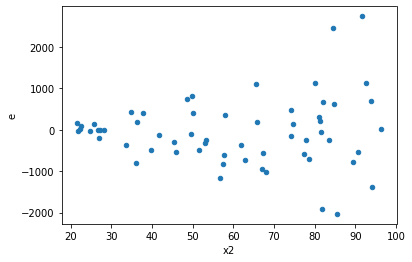

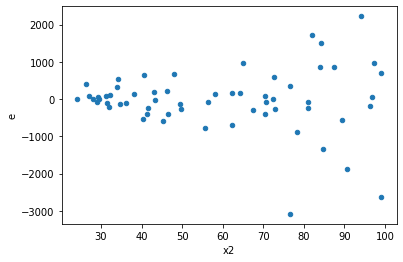

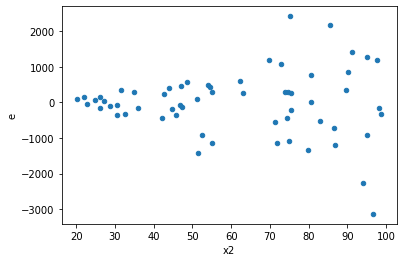

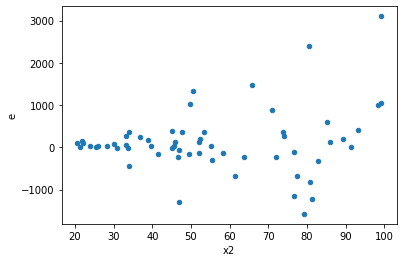

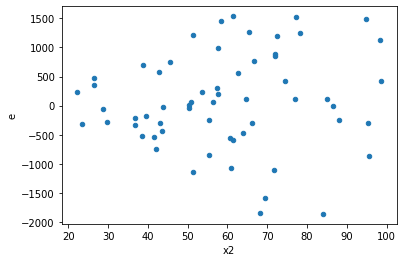

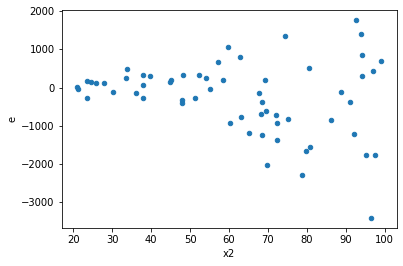

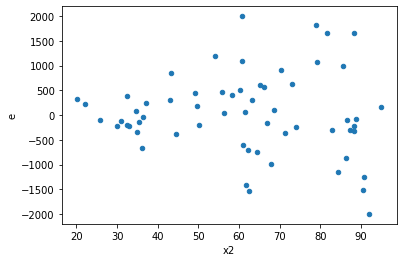

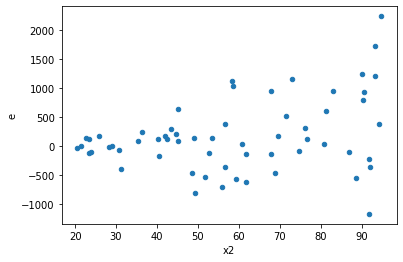

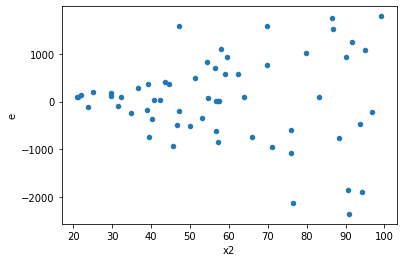

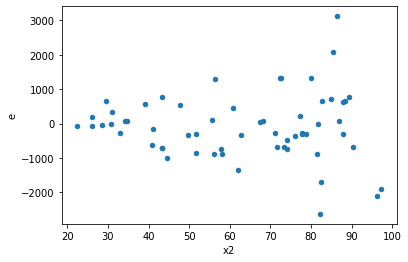

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,21.0,21.0,27121052.134676322,3257367.1508685667,1356052.6067338162,162868.35754342834,8.326065462852284,8.95361315644827e-06,0.9999955231934218,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,34533172.18563911,1927899.2491545195,1726658.6092819558,96394.96245772598,17.912332400556537,8.864733835878269e-09,0.9999999955676331,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,35991414.1972063,1641379.6659611028,1799570.709860315,82068.98329805514,21.927537512249906,1.2767609192110285e-09,0.9999999993616195,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,23806616.120534793,717609.7532947647,1190330.8060267395,35880.48766473823,33.174878144048876,2.1965540497603797e-11,0.9999999999890172,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,21896676.047687754,6345774.797290451,1094833.8023843877,317288.73986452253,3.4505914166757545,0.006475726928615311,0.9967621365356923,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,36391002.575847015,1228035.1858595677,1819550.1287923506,61401.759292978386,29.633517829845406,6.72220057396089e-11,0.999999999966389,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,22329163.676565308,2861494.033165108,1116458.1838282654,143074.7016582554,7.803323514837788,1.5438165062997555e-05,0.9999922809174685,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,8533937.813730564,1573454.5683079758,426696.8906865282,78672.72841539879,5.423695088258943,0.0002798304986311173,0.9998600847506844,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,36031730.05226218,5001986.815247568,1801586.502613109,250099.34076237842,7.2034836122371555,2.9899953883250063e-05,0.9999850500230584,Reject001=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,27121052.134676322,3257367.1508685667,1356052.6067338162,162868.35754342834,8.326065462852284,8.95361315644827e-06,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,34533172.18563911,1927899.2491545195,1726658.6092819558,96394.96245772598,17.912332400556537,8.864733835878269e-09,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,35991414.1972063,1641379.6659611028,1799570.709860315,82068.98329805514,21.927537512249906,1.2767609192110285e-09,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,23806616.120534793,717609.7532947647,1190330.8060267395,35880.48766473823,33.174878144048876,2.1965540497603797e-11,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,21896676.047687754,6345774.797290451,1094833.8023843877,317288.73986452253,3.4505914166757545,0.006475726928615311,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,36391002.575847015,1228035.1858595677,1819550.1287923506,61401.759292978386,29.633517829845406,6.72220057396089e-11,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,22329163.676565308,2861494.033165108,1116458.1838282654,143074.7016582554,7.803323514837788,1.5438165062997555e-05,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,8533937.813730564,1573454.5683079758,426696.8906865282,78672.72841539879,5.423695088258943,0.0002798304986311173,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,36031730.05226218,5001986.815247568,1801586.502613109,250099.34076237842,7.2034836122371555,2.9899953883250063e-05,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    988
Reject001=1 : Homoscedasticity       12
Name: Result_test, dtype: int64